A Course in Cryptography by Heiko Knospe, American Mathematical Society, Pure and Applied Undergraduate Texts 40

## Code examples of Chapter 12 - Elliptic Curve Cryptography¶

This SageMath notebook by Heiko Knospe is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

Download SageMath from http://www.sagemath.org/download.

Example: Elliptic curve $y^2=x^3+3x+5$ over $GF(19)$.

In [1]:
E=EllipticCurve(GF(19),[3,5])

In [2]:
E.points()

[(0 : 1 : 0), (0 : 9 : 1), (0 : 10 : 1), (1 : 3 : 1), (1 : 16 : 1), (2 : 0 : 1), (4 : 9 : 1), (4 : 10 : 1), (6 : 7 : 1), (6 : 12 : 1), (8 : 3 : 1), (8 : 16 : 1), (9 : 1 : 1), (9 : 18 : 1), (10 : 3 : 1), (10 : 16 : 1), (11 : 1 : 1), (11 : 18 : 1), (14 : 6 : 1), (14 : 13 : 1), (15 : 9 : 1), (15 : 10 : 1), (16 : 8 : 1), (16 : 11 : 1), (18 : 1 : 1), (18 : 18 : 1)]

In [3]:
E.order()

26

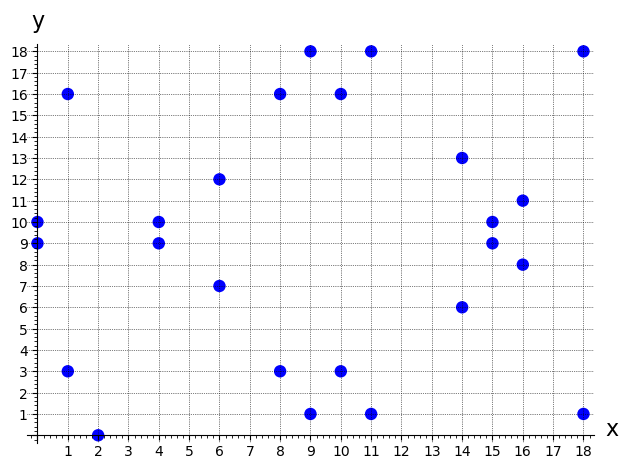

In [4]:
# plot the points of E(GF(19))
# point at infinity is not shown
E.plot(size=80,axes_labels=['x','y'],ticks=[1,1],gridlines=true)

In [5]:
P=E(1,3)
# multiples of P
print(2*P) 
print(13*P)
# Hence ord(P)=26

(18 : 18 : 1)
(2 : 0 : 1)


Example: Elliptic Curve Diffie-Hellman

In [6]:
# choose a generator of a subgroup of order 13
g=2*P; print(g) 

(18 : 18 : 1)


In [7]:
# public keys
A=2*g; print(A)
B=4*g; print(B)

(11 : 18 : 1)
(8 : 3 : 1)


In [8]:
# shared secret key
k=2*B; print(k)
k==4*A

(0 : 10 : 1)


True

Exampe: Elliptic Curve Factoring Method (ECM)

In [9]:
N=1211809; a=10;u=5;v=7;b=v^2-u^3-a*u; print (b)

-126


In [10]:
disc=-16*(4*a^3+27*b^2);gcd(disc,N) # nonsingular

1

In [11]:
E=EllipticCurve(IntegerModRing(N),[a,b]) # define E mod N

In [12]:
P=E(u,v)

In [13]:
Q=factorial(6)*P; print(Q)

(222064 : 820051 : 1)


In [14]:
print(6*Q)

(1011121 : 433793 : 1)


In [15]:
p=gcd(1011121-222064,N); print(p) # prime factor

1201


In [16]:
q=N//p; print(q) # other factor

1009


In [17]:
Ep=EllipticCurve(GF(p),[a,b]) # E over GF(p)
Eq=EllipticCurve(GF(q),[a,b]) # E over GF(p)

In [18]:
Pp=Ep(u,v) 
Pq=Eq(u,v)

In [19]:
Pp.order().factor() # order of P over GF(p)

2^3 * 3 * 7

In [20]:
factorial(7)*Pp # (7!)P=O over GF(p)

(0 : 1 : 0)

In [21]:
Pq.order().factor() # order of P over GF(q)

347

In [22]:
factorial(7)*Pq # (7!)P not O over GF(q)

(893 : 503 : 1)

Exercise 1.

In [23]:
# part (a)
E=EllipticCurve(GF(19),[3,5])
E.discriminant()

12

In [24]:
mod(-16*(4*3^3+27*5^2),19) # discriminant

12

In [25]:
P=E(4,9); 2*P

(9 : 18 : 1)

In [26]:
# use addition formulas to compute 2P
m=mod((3*4^2+3)/(2*9),19);print(m)

6


In [27]:
print(m^2-2*4) # x(2*P)

9


In [28]:
print(m*(4-9)-9) # y(2*P)


18


In [29]:
# part (b)
# Now E over Q
E=EllipticCurve(QQ,[3,5])

In [30]:
E.discriminant()

-12528

In [31]:
P=E(4,9); 2*P

(1/36 : 487/216 : 1)

In [32]:
# use addition formulas
m=(3*4^2+3)/(2*9);print(m)

17/6


In [33]:
print(m^2-2*4) # x(2*P)

1/36


In [34]:
print(m*(4-1/36)-9) # y(2*P)


487/216


In [35]:
# P has infinite order over Q
P.order()

+Infinity

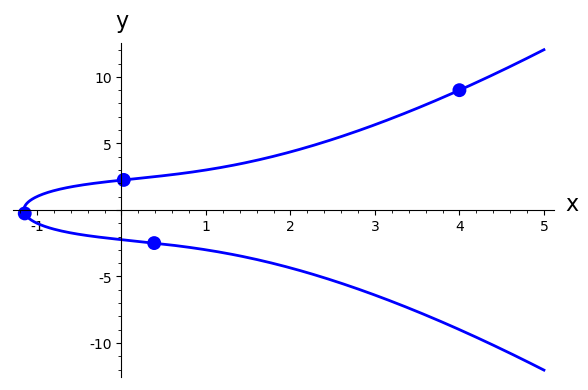

In [36]:
# plot the real curve and points P, 2P, 3P, 4P over Q
E.plot(axes_labels=['x','y'],xmax=5,thickness=2)+plot(P,size=100)+plot(2*P,size=100)+plot(3*P,size=100)+plot(4*P,size=100)

Exercise 4.

In [37]:
# Curve brainpoolP256r1 
p=0xA9FB57DBA1EEA9BC3E660A909D838D726E3BF623D52620282013481D1F6E5377
a=0x7D5A0975FC2C3057EEF67530417AFFE7FB8055C126DC5C6CE94A4B44F330B5D9
b=0x26DC5C6CE94A4B44F330B5D9BBD77CBF958416295CF7E1CE6BCCDC18FF8C07B6
xg=0x8BD2AEB9CB7E57CB2C4B482FFC81B7AFB9DE27E1E3BD23C23A4453BD9ACE3262
yg=0x547EF835C3DAC4FD97F8461A14611DC9C27745132DED8E545C1D54C72F046997
E=EllipticCurve(GF(p),[a,b])
g=E(xg,yg)
n=0xA9FB57DBA1EEA9BC3E660A909D838D718C397AA3B561A6F7901E0E82974856A7

In [38]:
p.is_prime()

True

In [39]:
n.is_prime()

True

In [40]:
E.order()==n

True

In [41]:
disc=-16*(4*a^3+27*b^2);print(mod(disc,p)) # nonzero

15036242490247342171513009477805930598983339216081386851174014206346325949410


In [42]:
mod(p,n).multiplicative_order() # large

38442478198522672110404873314500824546368765892207264769377759531531768179539

In [43]:
mod(p,n).multiplicative_order()==(n-1)//2

True

Exercise 5.

In [44]:
# Diffie-Hellman using the curve brainpool256r1
# Private keys a, b
a=0x81DB1EE100150FF2EA338D708271BE38300CB54241D79950F77B063039804F1D
b=0x55E40BC41E37E3E2AD25C3C6654511FFA8474A91A0032087593852D3E7D76BD3

In [45]:
# public keys A, B
A=a*g;print(A)

(30786306364684019669845085647834227301026705121148702657850323422577469426661 : 62738119601096463087058618165599972860801258532835385944058084661017583328220 : 1)


In [46]:
B=b*g; print(B)

(63856341335644447573330799294730313060965602021945406582077408231386506305403 : 69225670661515104449943687281706110118505391815211949231460931578788174425194 : 1)


In [47]:
# shared secret key
k=a*B;print(k)

(62277408572425350581153587818274169049667602786711788049878422423086378303275 : 33362437316335065570684137232427223851259119247580365682976721759161769329886 : 1)


In [48]:
k==b*A

True

Exercise 6.

In [49]:
N=6227327; a=4;u=6;v=2;b=v^2-u^3-a*u

In [50]:
disc=-16*(4*a^3+27*b^2);gcd(disc,N)

1

In [51]:
E=EllipticCurve(IntegerModRing(N),[a,b]) # define E mod N

In [52]:
P=E(u,v)

In [53]:
Q=factorial(12)*P; print(Q)

(3183142 : 5717628 : 1)


In [54]:
print(12*Q)

(506293 : 4862299 : 1)


In [55]:
gcd(3183142-506293,N) #  prime factor of N

3109

In [56]:
p=3109;q=N//p;print(q) # other factor

2003


In [57]:
Ep=EllipticCurve(GF(p),[a,b]) # E over GF(p)

In [58]:
Pp=Ep(u,v)

In [59]:
Pp.order().factor() # order of P over GF(p)

2^3 * 3 * 5 * 13

In [60]:
factorial(13)*Pp  # (13!)P=O

(0 : 1 : 0)

In [61]:
Eq=EllipticCurve(GF(q),[a,b]) # E over GF(q)

In [62]:
Pq=Eq(u,v)

In [63]:
Pq.order().factor() # order of P over GF(q)

7 * 17^2

In [64]:
factorial(13)*Pq # (13!)Q not O over GF(q)

(751 : 1480 : 1)

Exercise 7.

In [65]:
# ECDSA
E=EllipticCurve(GF(19),[3,5])
g=E(18,18)

In [66]:
n=g.order(); print(n)

13


In [67]:
a=2 # private key
A=a*g; print(A) # public key

(11 : 18 : 1)


In [68]:
k=3
print(k*g)

(9 : 1 : 1)


In [69]:
# r=x(k*g)
r=9
hm=11 # H(m)
s=mod((1/k)*(hm+a*r),n)
print(r,s) # Signature 

9 1


In [70]:
# Verify signature 
r=9
s=1
R=ZZ(mod((1/s)*hm,n))*g+ZZ(mod((1/s)*r,n))*A
print(R) # signature ok, x(R)=r 

(9 : 1 : 1)
